In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional
from sklearn.metrics import mean_squared_error

In [35]:
df = pd.read_csv('/content/BTC-USD (3).csv')
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Close'])
df = df.set_index('Date')

In [36]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

In [37]:
def create_dataset(dataset, window_size=60):
    X, y = [], []
    for i in range(len(dataset)-window_size-1):
        X.append(dataset[i:(i+window_size), 0])
        y.append(dataset[(i+window_size), 0])
    return np.array(X), np.array(y)

window_size = 60
train_X, train_y = create_dataset(train_data, window_size)
test_X, test_y = create_dataset(test_data, window_size)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [38]:

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(window_size, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(train_X, train_y, epochs=50, batch_size=16, verbose=1)

#200 16
# GRU model
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(window_size, 1)))
gru_model.add(Dense(1))
gru_model.compile(loss='mean_squared_error', optimizer='adam')
gru_model.fit(train_X, train_y, epochs=50, batch_size=16, verbose=1)

# Bidirectional LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(50, input_shape=(window_size, 1))))
bilstm_model.add(Dense(1))
bilstm_model.compile(loss='mean_squared_error', optimizer='adam')
bilstm_model.fit(train_X, train_y, epochs=50, batch_size=16, verbose=1)


Epoch 1/50
155/155 [==============================] - 5s 22ms/step - loss: 0.0032
Epoch 2/50
155/155 [==============================] - 3s 22ms/step - loss: 3.9071e-04
Epoch 3/50
155/155 [==============================] - 4s 23ms/step - loss: 3.4343e-04
Epoch 4/50
155/155 [==============================] - 3s 22ms/step - loss: 3.1021e-04
Epoch 5/50
155/155 [==============================] - 3s 21ms/step - loss: 2.6878e-04
Epoch 6/50
155/155 [==============================] - 4s 24ms/step - loss: 2.4698e-04
Epoch 7/50
155/155 [==============================] - 3s 21ms/step - loss: 2.2120e-04
Epoch 8/50
155/155 [==============================] - 3s 21ms/step - loss: 2.3578e-04
Epoch 9/50
155/155 [==============================] - 3s 22ms/step - loss: 2.1267e-04
Epoch 10/50
155/155 [==============================] - 4s 23ms/step - loss: 2.0281e-04
Epoch 11/50
155/155 [==============================] - 3s 21ms/step - loss: 1.8556e-04
Epoch 12/50
155/155 [==============================] - 3

In [39]:
# LSTM model predictions
train_predict_lstm = lstm_model.predict(train_X)
test_predict_lstm = lstm_model.predict(test_X)

# GRU model predictions
train_predict_gru = gru_model.predict(train_X)
test_predict_gru = gru_model.predict(test_X)

# Bidirectional LSTM model predictions
train_predict_bilstm = bilstm_model.predict(train_X)
test_predict_bilstm = bilstm_model.predict(test_X)

# Inverse transform the predictions to get the actual values
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
train_y_lstm = scaler.inverse_transform([train_y])
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)
test_y_lstm = scaler.inverse_transform([test_y])

train_predict_gru = scaler.inverse_transform(train_predict_gru)
train_y_gru = scaler.inverse_transform([train_y])
test_predict_gru = scaler.inverse_transform(test_predict_gru)
test_y_gru = scaler.inverse_transform([test_y])

train_predict_bilstm = scaler.inverse_transform(train_predict_bilstm)
train_y_bilstm = scaler.inverse_transform([train_y])
test_predict_bilstm = scaler.inverse_transform(test_predict_bilstm)
test_y_bilstm = scaler.inverse_transform([test_y])

# Calculate the MSE
train_score_lstm = np.sqrt(mean_squared_error(train_y_lstm[0], train_predict_lstm[:,0]))
test_score_lstm = np.sqrt(mean_squared_error(test_y_lstm[0], test_predict_lstm[:,0]))

train_score_gru = np.sqrt(mean_squared_error(train_y_gru[0], train_predict_gru[:,0]))
test_score_gru = np.sqrt(mean_squared_error(test_y_gru[0], test_predict_gru[:,0]))

train_score_bilstm = np.sqrt(mean_squared_error(train_y_bilstm[0], train_predict_bilstm[:,0]))
test_score_bilstm = np.sqrt(mean_squared_error(test_y_bilstm[0], test_predict_bilstm[:,0]))

print('LSTM Train Score: %.6f RMSE' % (train_score_lstm))
print('LSTM Test Score: %.6f RMSE' % (test_score_lstm))

print('GRU Train Score: %.6f RMSE' % (train_score_gru))
print('GRU Test Score: %.6f RMSE' % (test_score_gru))

print('Bidirectional LSTM Train Score: %.6f RMSE' % (train_score_bilstm))
print('Bidirectional LSTM Test Score: %.6f RMSE' % (test_score_bilstm))


18/18 [==============================] - 0s 9ms/step
LSTM Train Score: 667.991918 RMSE
LSTM Test Score: 1100.484214 RMSE
GRU Train Score: 724.234318 RMSE
GRU Test Score: 1118.825152 RMSE
Bidirectional LSTM Train Score: 707.408109 RMSE
Bidirectional LSTM Test Score: 1155.242438 RMSE


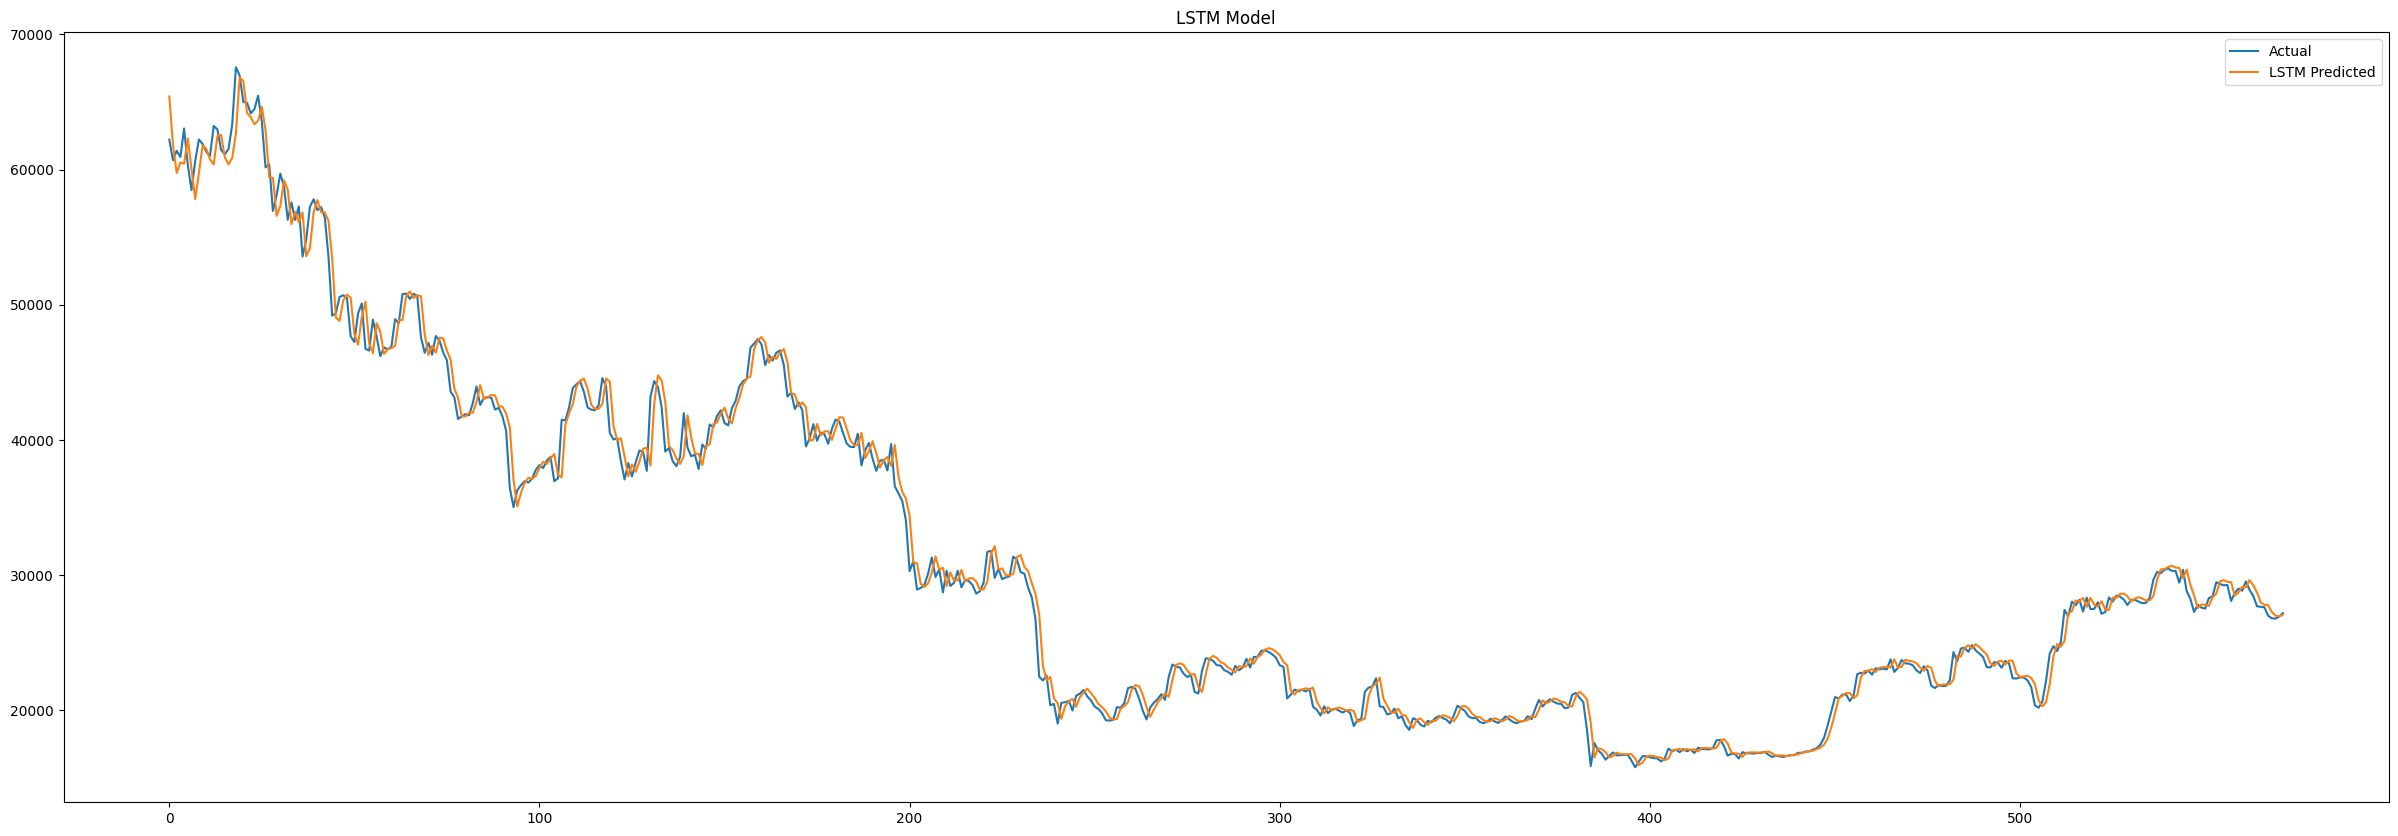

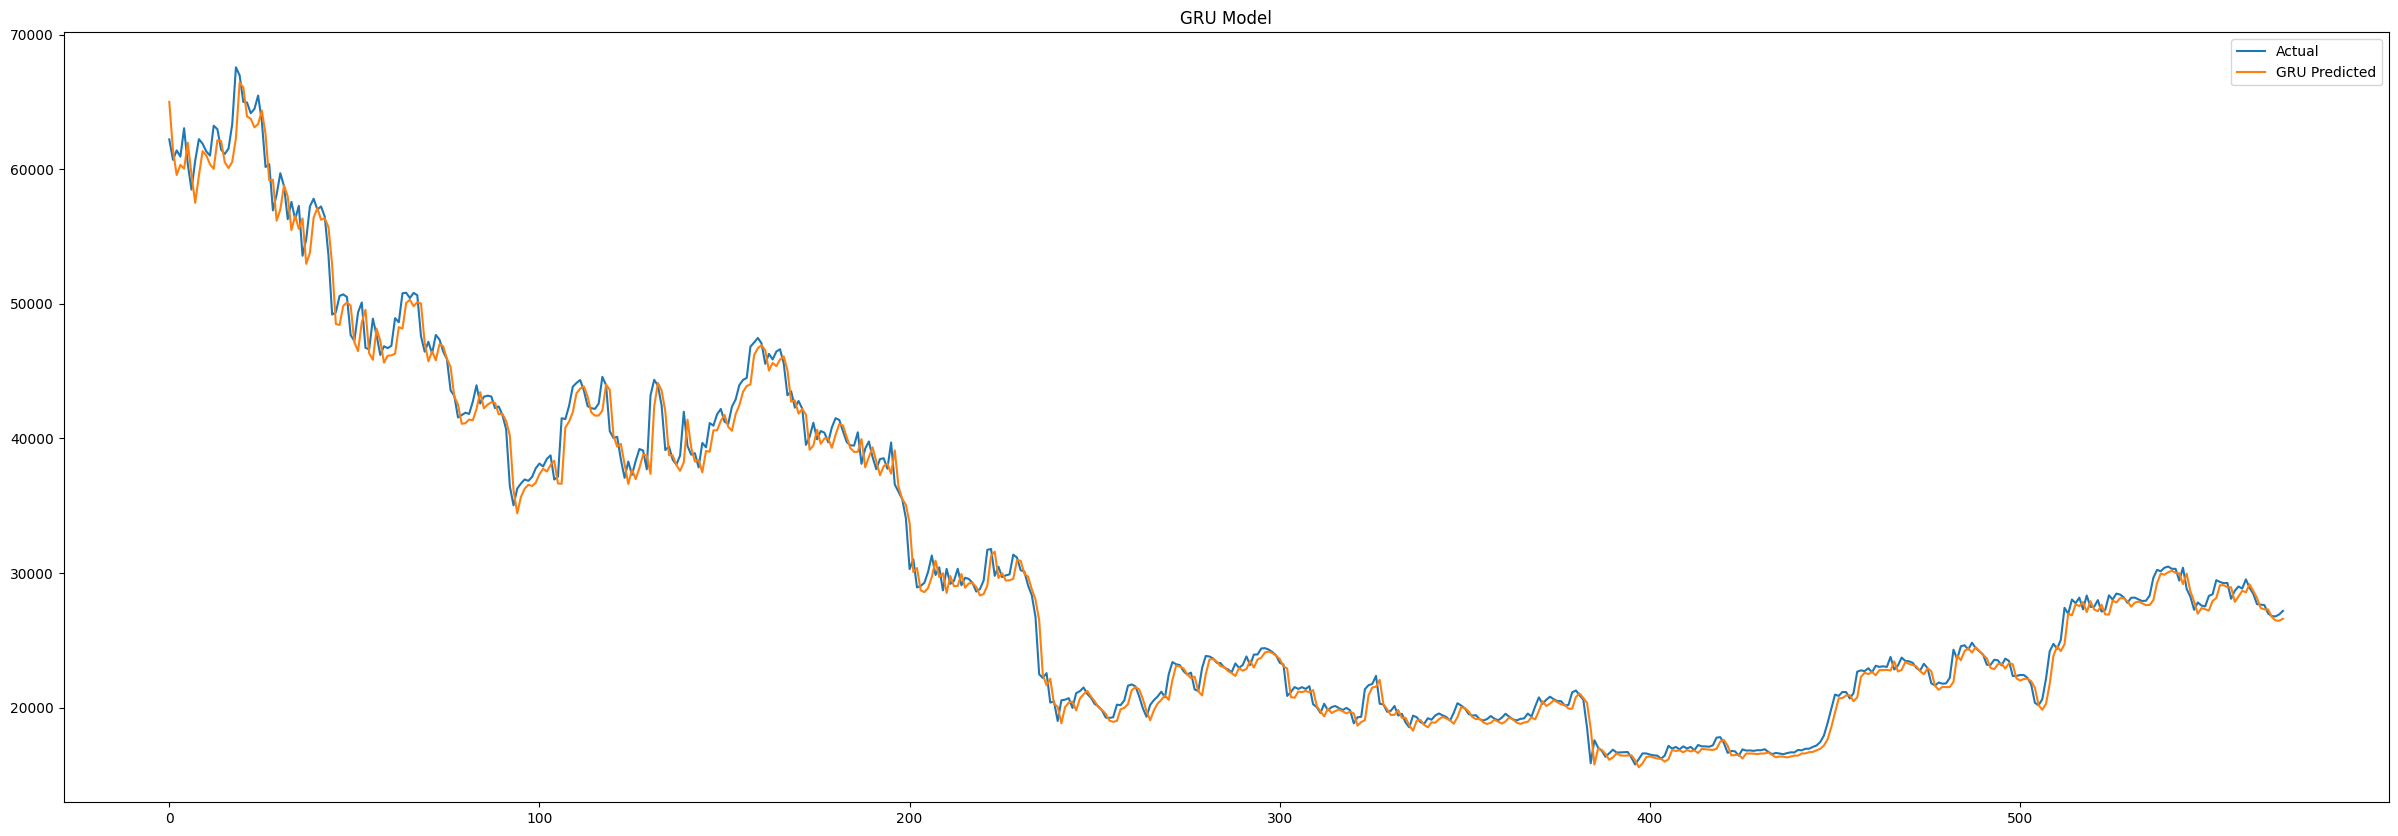

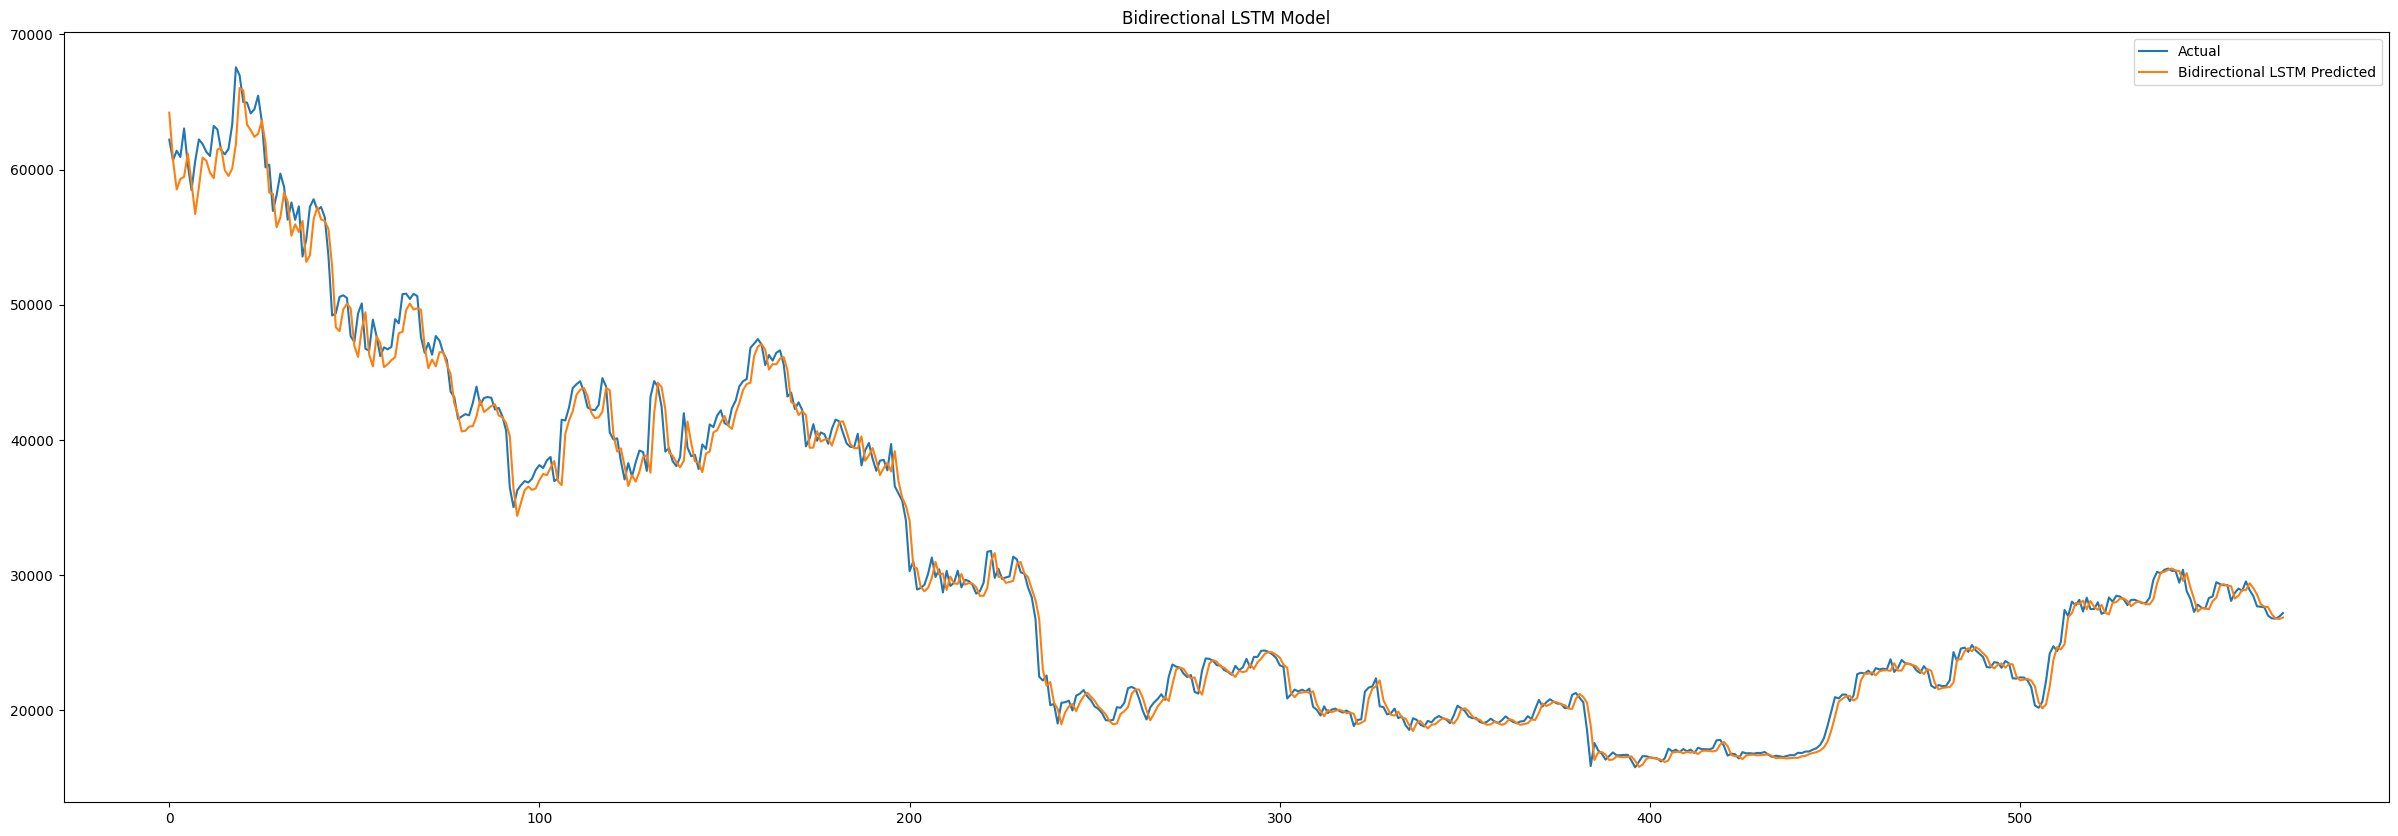

In [40]:
# Plot the actual prices and predicted prices
plt.figure(figsize=(30,10))
plt.plot(test_y_lstm[0])
plt.plot(test_predict_lstm[:,0])
plt.legend(['Actual', 'LSTM Predicted'])
plt.title('LSTM Model')
plt.show()

plt.figure(figsize=(30,10))
plt.plot(test_y_gru[0])
plt.plot(test_predict_gru[:,0])
plt.legend(['Actual', 'GRU Predicted'])
plt.title('GRU Model')
plt.show()

plt.figure(figsize=(30,10))
plt.plot(test_y_bilstm[0])
plt.plot(test_predict_bilstm[:,0])
plt.legend(['Actual', 'Bidirectional LSTM Predicted'])
plt.title('Bidirectional LSTM Model')
plt.show()
